# INDIA GDP ANALYSIS

In [166]:
import os
import pandas as pd
import plotly.express as px
import plotly.offline as pyo

df = pd.read_csv('gdp.csv')
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


## Description of each columns

In [169]:
print('Description of Country Column : ')
df['Country Name'].describe()

Description of Country Column : 


count                    11507
unique                     256
top       Hong Kong SAR, China
freq                        57
Name: Country Name, dtype: object

In [171]:
print('Description of Country Code : ')
df['Country Code'].describe()

Description of Country Code : 


count     11507
unique      256
top         HKG
freq         57
Name: Country Code, dtype: object

In [173]:
print('Minimum Year : ',df['Year'].min())
print('Maximum Year : ',df['Year'].max())

Minimum Year :  1960
Maximum Year :  2016


## Analysing India's GDP

In [176]:
df_in = df[df['Country Name'] == 'India']

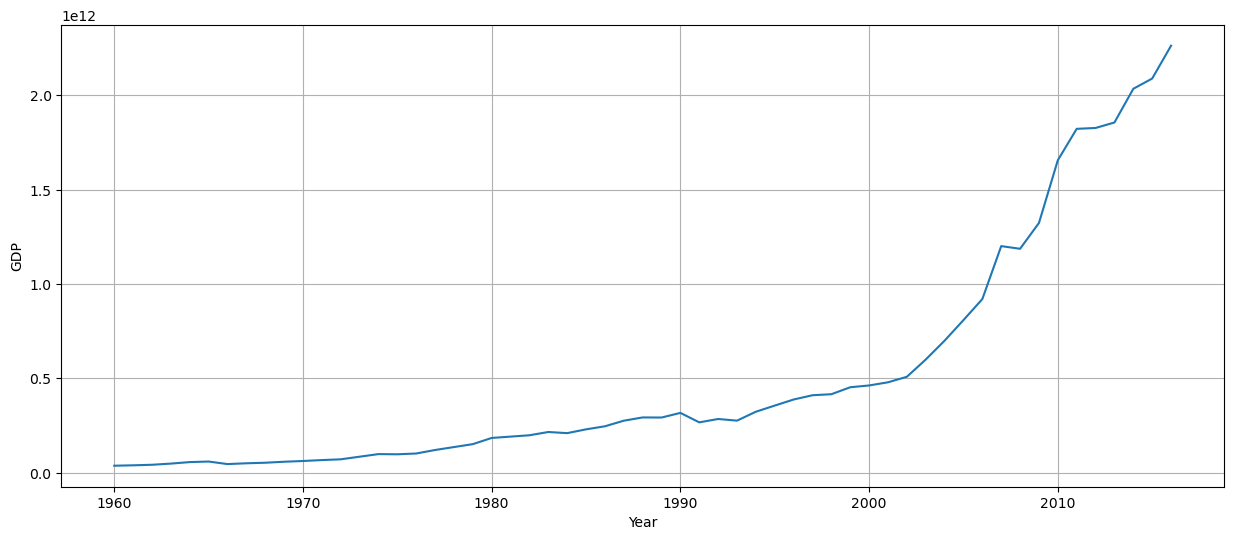

In [178]:
df_in.plot(kind = 'line' , x = 'Year' , y = 'Value', 
           figsize = (15,6),
           grid = True,
           legend = False,
           ylabel = 'GDP')
print('')

This Graph shows the growth of GDP in India from 1960-2016

In [181]:
data = df_in.values

gdp_change = [0]

for i in range(1,len(data)):
    prev_gdp = data[i-1][3]
    curr_gdp = data[i][3]
    gdp_change.append(round(((curr_gdp - prev_gdp) / prev_gdp)*100,2))

In [183]:
df_in.assign(GDP = gdp_change)

,Country Name,Country Code,Year,Value,GDP
6074,India,IND,1960,3.653593e+10,0.00
6075,India,IND,1961,3.870910e+10,5.95
6076,India,IND,1962,4.159907e+10,7.47
6077,India,IND,1963,4.777600e+10,14.85
6078,India,IND,1964,5.572687e+10,16.64
6079,India,IND,1965,5.876042e+10,5.44
6080,India,IND,1966,4.525364e+10,-22.99
6081,India,IND,1967,4.946617e+10,9.31
6082,India,IND,1968,5.237732e+10,5.89
6083,India,IND,1969,5.766833e+10,10.10


##### New column 'GDP' tells us the change in percentage of GDP from previous year.
##### Formula for finding GDP Change Percentage :
##### GDP Change Percentage = (Current GDP - Previous GDP) / Previous GDP)*100

## GDP Growth for every Country

In [187]:
final_data = []

for country_name in df['Country Name'].unique():
    
    df_pr = df[df['Country Name'] == country_name]

    data = df_pr.values
    gdp_change = [0]

    for i in range(1,len(data)):

        prev = data[i-1][3]
        cur = data[i][3]

        gdp_change.append(round(((cur - prev) / prev)*100,2))

    df_pr = df_pr.assign(GDP = gdp_change)
    final_data.append(df_pr)

In [189]:
df = pd.concat(final_data , axis=0)

In [191]:
df

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


In [193]:
print('Top 20 countries with highest GDP Value :')
df.groupby('Country Name').max()['Value'].sort_values(ascending = False).head(20)

Top 20 countries with highest GDP Value :


Country Name
World                                          7.904923e+13
High income                                    5.036240e+13
OECD members                                   4.937008e+13
Post-demographic dividend                      4.673504e+13
IDA & IBRD total                               2.948247e+13
Low & middle income                            2.870476e+13
Middle income                                  2.829277e+13
IBRD only                                      2.739661e+13
Europe & Central Asia                          2.365470e+13
East Asia & Pacific                            2.248043e+13
Upper middle income                            2.221220e+13
North America                                  2.016030e+13
Late-demographic dividend                      1.970310e+13
European Union                                 1.913667e+13
United States                                  1.862448e+13
Euro area                                      1.411818e+13
East Asia & Pacific (exclud

##### Here, United States has the highest GDP Value of '1.862448e+13'
##### India has the GDP Value of '2.263792e+12'

In [196]:
print('Top 10 countries with highest GDP Growth :')
df.groupby('Country Name').max()['GDP'].sort_values(ascending = False).head(10)

Top 10 countries with highest GDP Growth :


Country Name
Switzerland          479.82
Equatorial Guinea    409.33
Cambodia             330.58
Congo, Dem. Rep.     305.16
Oman                 240.75
Cayman Islands       216.76
Saudi Arabia         203.82
Qatar                202.49
Iraq                 174.04
Kiribati             170.06
Name: GDP, dtype: float64

##### Here, Switzerland has the highest GDP Growth of '479.82'

## Visualization

In [202]:
df_pr = df[df['Country Name'] == 'India']

fig1 = px.line(df_pr, x = 'Year', y = 'Value', title = 'India GDP Analysis')

pyo.plot(fig1, filename = 'India.html',auto_open = False)

'India.html'

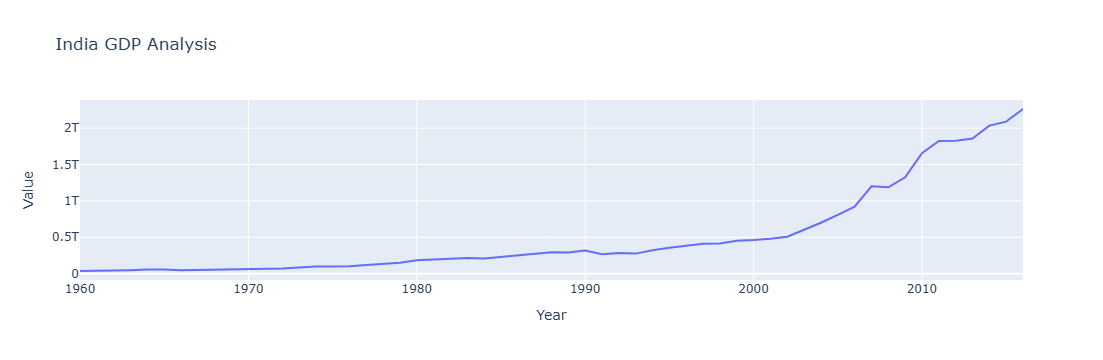

In [206]:
pyo.plot(fig1, filename = 'India GDP.html',auto_open = False)
fig1

In 1991 India GDP fall by 50.1947 billion i.e 15.84%

In 2008,India GDP fall by 1.17%

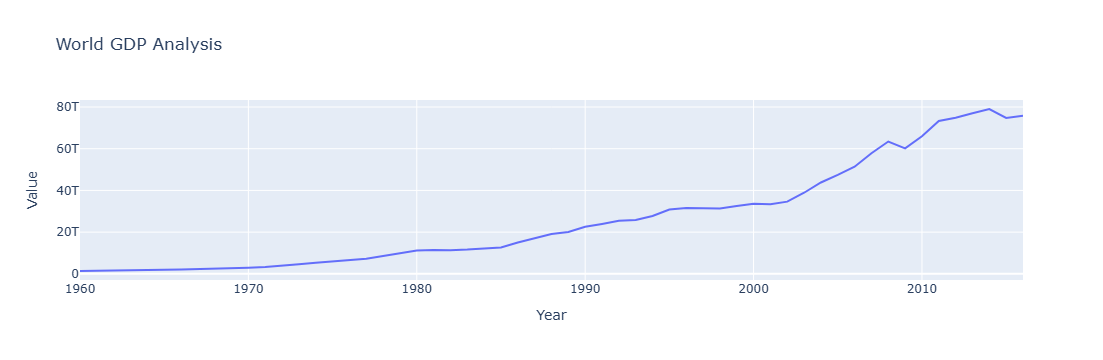

In [220]:
df_pr = df[df['Country Name'] == 'World']

fig2 = px.line(df_pr, x = 'Year', y = 'Value', title = 'World GDP Analysis')

fig2

In [224]:
pyo.plot(fig2, filename = 'World GDP.html',auto_open = False)

'World GDP.html'

## GDP of each country

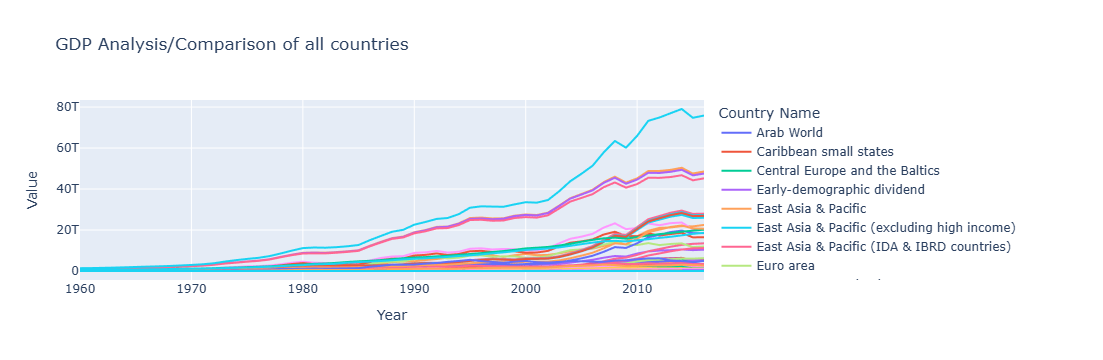

In [44]:
fig = px.line(df, x = 'Year', y = 'Value', title = 'GDP Analysis/Comparison of all countries',color = 'Country Name')
fig

In 2008-09,there was a fall in GDP across all countries

In [45]:
pyo.plot(fig, filename = 'GDP Comaprison of all countries')

C:\Users\prabh\anaconda3\Lib\site-packages\plotly\offline\offline.py:557: UserWarning:

Your filename `GDP Comaprison of all countries` didn't end with .html. Adding .html to the end of your file.



'GDP Comaprison of all countries.html'

## Comaprison of India and China GDP

In [229]:
c1 = df[df['Country Name'] == 'China']
c2 = df[df['Country Name'] == 'India']

In [231]:
df_pr = pd.concat([c1,c2],axis = 0)

In [233]:
df_pr

,Country Name,Country Code,Year,Value,GDP
4046,China,CHN,1960,5.971647e+10,0.00
4047,China,CHN,1961,5.005687e+10,-16.18
4048,China,CHN,1962,4.720936e+10,-5.69
4049,China,CHN,1963,5.070680e+10,7.41
4050,China,CHN,1964,5.970834e+10,17.75
...,...,...,...,...,...
6126,India,IND,2012,1.827638e+12,0.25
6127,India,IND,2013,1.856722e+12,1.59
6128,India,IND,2014,2.035393e+12,9.62
6129,India,IND,2015,2.089865e+12,2.68


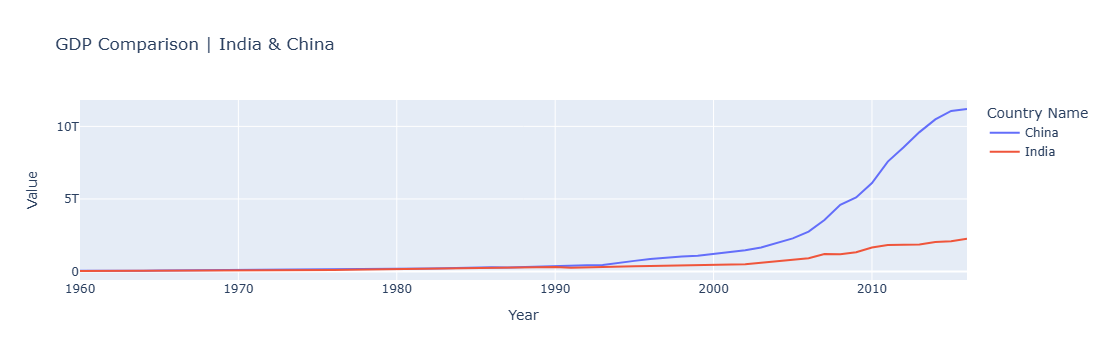

In [235]:
fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison | India & China', color = 'Country Name')
fig

After 1993,China GDP increases exponentially.

In [239]:
fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison | India & China', color = 'Country Name')

pyo.plot(fig, filename = 'IND-CHN.html',auto_open = False)

'IND-CHN.html'

In [241]:
def comare_gdp1(lst, isOpen):
    
    dfs = []
    for i in lst:
        dfs.append(df[df['Country Code'] == i])

        df_pr = pd.concat(dfs, axis = 0)
        
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison - ' + '-'.join(lst), 
                  color = 'Country Name')
    return fig

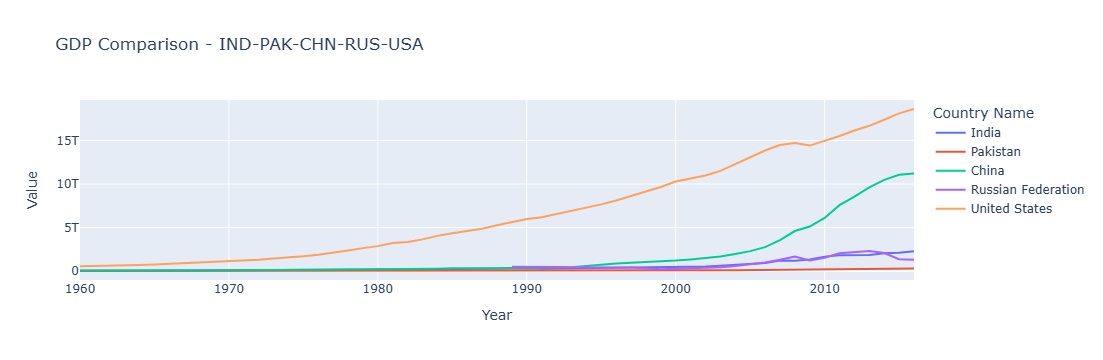

In [243]:
comare_gdp1(['IND','PAK','CHN','RUS','USA'], False)

In [245]:
def comare_gdp(lst, isOpen):
    
    dfs = []
    for i in lst:
        dfs.append(df[df['Country Code'] == i])

        df_pr = pd.concat(dfs, axis = 0)
        
    fig = px.line(df_pr, x = 'Year', y = 'GDP', title = 'GDP Comparison - ' + '-'.join(lst), 
                  color = 'Country Name')
    return fig

In [247]:
pyo.plot(fig3,filename = 'GDP Growth Comparison of India and China.html',auto_open = False)

'GDP Growth Comparison of India and China.html'

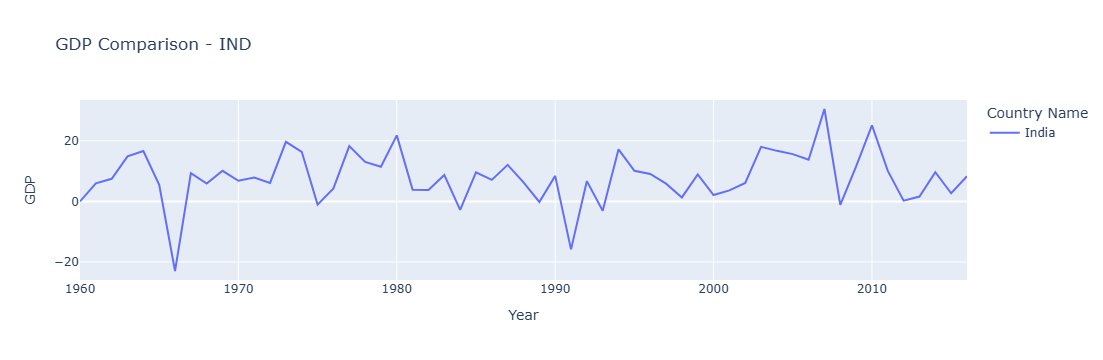

In [249]:
comare_gdp(['IND'],False)

In [251]:
fig3 = comare_gdp(['IND','CHN'], False)

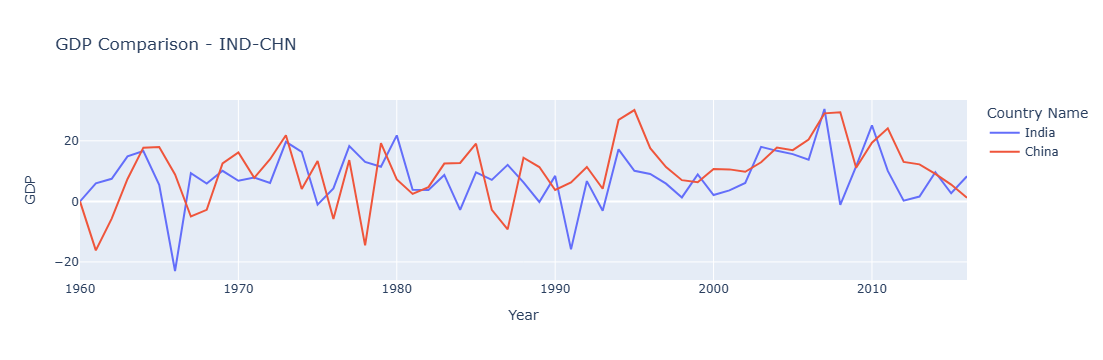

In [253]:
pyo.plot(fig3,filename = 'GDP Growth Comparison of India and China.html',auto_open = False)
fig3

i) In 1961,China GDP Growth decrease by -16.18% while India GDP Growth increase by 5.95%.

ii) In 1964 China GDP Growth rate increase exponentially with 17.75%.

iii) In 1964, China growth rate crosses the India GDP Growth rate by 1.11%.

iv) In 1966,India and China Growth Rate decrease by 22.99% and 8.92%.

v) During 1976 and 1978 period, India GDP Growth Rate increased in compare to China.

vi) In 2008 China GDP growth rate increased by 0.35% while India GDP Growth Rate decreased by -1.18%.

In [261]:
fig4 = comare_gdp(['IND','USA'], False)

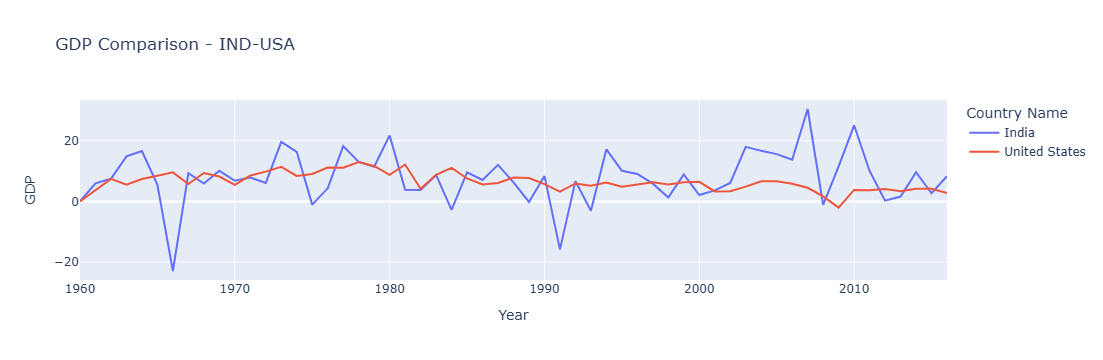

In [263]:
fig4

In [272]:
fig5 = comare_gdp(['IND','PAK'], False)

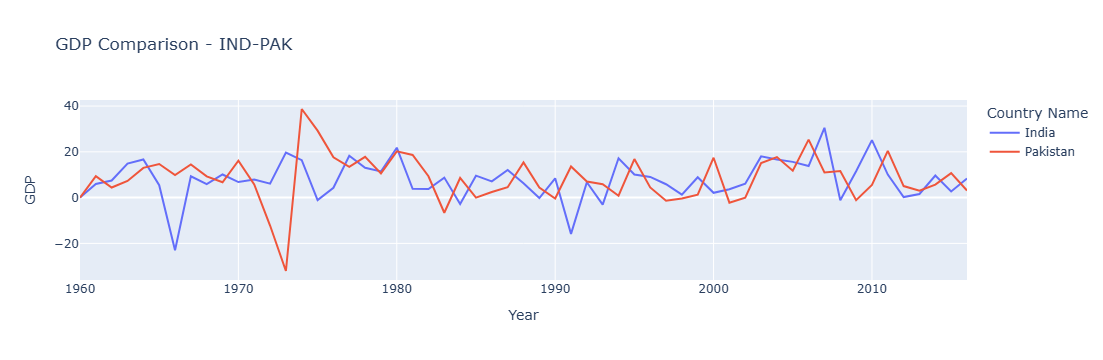

In [280]:
pyo.plot(fig5 , filename = 'India-Pakistan GDP Growth Comparison.html',auto_open = False)
fig5